In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd
which_pc = 'wqiang'

In [2]:
import sys
sys.path.append("C:\\Users\\"+which_pc+"\\QishiQR")
import Utils.MajorContract_Offsets
import importlib

#importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *


import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

import Backtesting.Vectorized.Strategy
importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

# Zn data and PTBs

In [8]:
prod = 'zn'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        zn_train, zn_test, zn_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1603':['2016-1-1','2016-2-29'],
                                                                     '1604':['2016-2-1','2016-3-31'],
                                                                     '1605':['2016-3-1','2016-4-30'],
                                                                     '1606':['2016-4-1','2016-5-31'],
                                                                     '1607':['2016-5-1','2016-6-30'],
                                                                     '1608':['2016-6-1','2016-7-31'],
                                                                     '1609':['2016-7-1','2016-8-31'],
                                                                     '1610':['2016-8-1','2016-9-30'],
                                                                     '1611':['2016-9-1','2016-10-31'],
                                                                     '1612':['2016-10-1','2016-11-30'],
                                                                     '1701':['2016-11-1','2016-12-31'],
                                                                     '1702':['2016-12-1','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1603':'2016-2-1', 
                                                                     '1604':'2016-3-1',
                                                                     '1605':'2016-4-1',
                                                                     '1606':'2016-5-1',
                                                                     '1607':'2016-6-1',
                                                                     '1608':'2016-7-1',
                                                                     '1609':'2016-8-1',
                                                                     '1610':'2016-9-1',
                                                                     '1611':'2016-10-1',
                                                                     '1612':'2016-11-1',
                                                                     '1701':'2016-12-1',
                                                                     '1702':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th).create_major_overlap()

        for offset in zn_test.keys():
            zn_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'zn/'+str(freq)+'min/'+'zn_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1603', '1604', '1605', '1606', '1607', '1608']:
                zn_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)


pct_th=10bps, freq = 5min
zn1603 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1603 ['2016-1-1', '2016-2-29'] 2016-01-01 00:00:00 2016-02-01 00:00:00
probability table:  20160104.0 20160130.0
probability table:  20160104.0 20160130.0
probability table:  20160104 20160130
probability table:  20160104 20160130
probability table:  20160104 20160130
zn1604 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1604 ['2016-2-1', '2016-3-31'] 2016-02-01 00:00:00 2016-03-01 00:00:00
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
probability table:  20160130.0 20160229.0
zn1605 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30

zn1605 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1605 ['2016-3-1', '2016-4-30'] 2016-03-01 00:00:00 2016-04-01 00:00:00
probability table:  20160301.0 20160331.0
probability table:  20160301.0 20160331.0
probability table:  20160301.0 20160331.0
probability table:  20160301 20160331
probability table:  20160301 20160331
zn1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2016-4-1', '2016-5-31'] 2016-04-01 00:00:00 2016-05-01 00:00:00
probability table:  20160401.0 20160429.0
probability table:  20160401 20160429
probability table:  20160401 20160429
probability table:  20160401 20160429
probability table:  20160401 20160429
zn1607 C:\\Users\\Maxcell-HomePC\QishiQR\Data/zn
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1607 ['2016-5-1', '2016-6-30'] 2016-05-01 00:00:00 2016-06-01 00:0

# Bu data and PTBs

In [10]:
prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        bu_train, bu_test, bu_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1606':['2015-11-1','2016-5-1'], 
                                                                     '1609':['2016-2-1','2016-8-1'], 
                                                                     '1612':['2016-6-1','2016-11-15'],
                                                                     '1706':['2016-10-15','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1606':'2016-3-1', 
                                                                     '1609':'2016-7-1', 
                                                                     '1612':'2016-11-1', 
                                                                     '1706':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th).create_major_overlap()

        for offset in bu_test.keys():
            bu_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'bu/'+str(freq)+'min/'+'bu_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1606', '1609', '1612']:
                bu_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)



pct_th=0bps, freq = 5min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
bu1609 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-0

bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
pct_th=5bps, freq = 30min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
bu1609 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-0

# Zn/Bu PTB distribution

In [6]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for freq in freq_set:
    for pct_th_bps in pct_th_bps_set: 
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
        slm.to_csv('../../Strategy/'+prod+'_major_strategy.csv')

        p1 = slm[slm['prior'].apply(len) == 2]
        p2 = slm[slm['prior'].apply(len) == 3]
        p3 = slm[slm['prior'].apply(len) == 4]
        p4 = slm[slm['prior'].apply(len) == 5]
        p5 = slm[slm['prior'].apply(len) == 6]
        p6 = slm[slm['prior'].apply(len) == 7]

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['total'].tolist()
        cnt_list1[0] = 0
        cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['total'].tolist()
        cnt_list2[0] = 0
        cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['total'].tolist()
        cnt_list3[0] = 0
        cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['total'].tolist()
        cnt_list4[0] = 0
        cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['total'].tolist()
        cnt_list5[0] = 0
        cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['total'].tolist()
        cnt_list6[0] = 0
        cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)
        fig.savefig(prod + '_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_cnt_dist.png', dpi=fig.dpi)

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['max_pct'].tolist()
        cnt_list1[0] = 0
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['max_pct'].tolist()
        cnt_list2[0] = 0
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['max_pct'].tolist()
        cnt_list3[0] = 0
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['max_pct'].tolist()
        cnt_list4[0] = 0
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['max_pct'].tolist()
        cnt_list5[0] = 0
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['max_pct'].tolist()
        cnt_list6[0] = 0
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)

        fig.savefig(prod+'_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_max_pct_dist.png', dpi=fig.dpi)

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


pct_th=5bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
pct_th=10bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_

## Zn/Bu backtesting 

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
         prior   0   1   2  total signal
3277  p2222220  15  30  15     60      1
3278  p2222221  35  55  75    165      2
3279  p2222222  35  70  30    135      1
bu_major_5_0.1.csv


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_1.1.csv


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


bu_major_5_2.1.csv
bu_major_5_3.1.csv
bu_major_5_4.1.csv


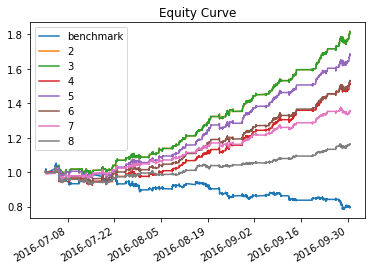

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244934              0.009255                -0.002889   
1               0.244934              0.009255                -0.002889   
2               0.271598              0.006514                -0.003259   
3               0.256403              0.008177                -0.002955   
4               0.275883              0.006695                -0.003084   
5               0.266293              0.004786                -0.002977   
6               0.275255              0.002409                -0.002826   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001768                  0.000372             -0.032218   
1                 0.001768                  0.000372             -0.032218   
2                 0.001761                  0.000296             -0.027434   
3                 0.001758                  0.000319             -0.028542   
4        

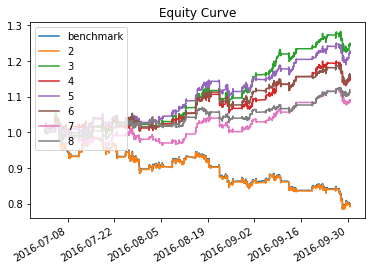

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.279023              0.003476                -0.003890   
2               0.248334              0.002234                -0.004517   
3               0.241395              0.003223                -0.004116   
4               0.245119              0.002377                -0.004149   
5               0.249158              0.001377                -0.003928   
6               0.261736              0.001793                -0.003500   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002192                  0.000249             -0.030195   
2                 0.002641                  0.000216             -0.029502   
3                 0.002513                  0.000278             -0.029187   
4        

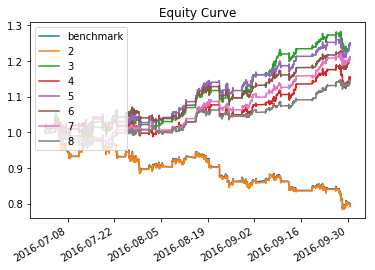

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.279023              0.003476                -0.003890   
2               0.247056              0.002268                -0.004207   
3               0.239937              0.003519                -0.004014   
4               0.242522              0.002991                -0.003882   
5               0.241333              0.003019                -0.003637   
6               0.262445              0.002137                -0.003348   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002192                  0.000249             -0.030195   
2                 0.002463                  0.000194             -0.028050   
3                 0.002440                  0.000289             -0.029397   
4        

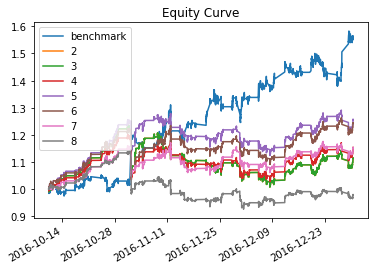

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.466133              0.001911                -0.004294   
1               0.466133              0.001911                -0.004294   
2               0.436500              0.002503                -0.004631   
3               0.453239              0.003953                -0.004343   
4               0.455351              0.003777                -0.004521   
5               0.430807              0.002487                -0.004443   
6               0.463656             -0.000276                -0.004151   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002108                  0.000072             -0.134260   
1                 0.002108                  0.000072             -0.134260   
2                 0.002195                  0.000108             -0.134260   
3                 0.002147                  0.000149             -0.116885   
4        

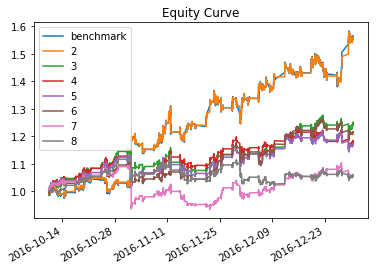

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.385649              0.003865                -0.005277   
2               0.411711              0.002934                -0.006217   
3               0.408748              0.002782                -0.005965   
4               0.415130              0.003375                -0.005834   
5               0.430745              0.001038                -0.005875   
6               0.458069              0.001042                -0.005308   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002931                  0.000254             -0.115746   
2                 0.003676                  0.000255             -0.121298   
3                 0.003425                  0.000224             -0.122083   
4        

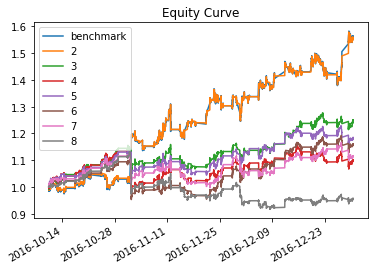

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.385649              0.003865                -0.005277   
2               0.399511              0.001720                -0.006034   
3               0.407196              0.002966                -0.005839   
4               0.402456              0.002597                -0.005699   
5               0.434506              0.001931                -0.005465   
6               0.450362             -0.000649                -0.005089   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002931                  0.000254             -0.115746   
2                 0.003387                  0.000140             -0.133195   
3                 0.003347                  0.000233             -0.122083   
4        

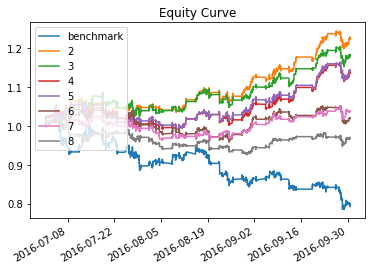

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257246              0.003227                -0.004204   
1               0.267064              0.002638                -0.003994   
2               0.265189              0.002051                -0.004042   
3               0.246796              0.002117                -0.004074   
4               0.264325              0.000315                -0.003864   
5               0.265645              0.000590                -0.003809   
6               0.257937             -0.000520                -0.003690   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002301                  0.000249             -0.029763   
1                 0.002332                  0.000176             -0.029565   
2                 0.002292                  0.000144             -0.029763   
3                 0.002327                  0.000153             -0.031637   
4        

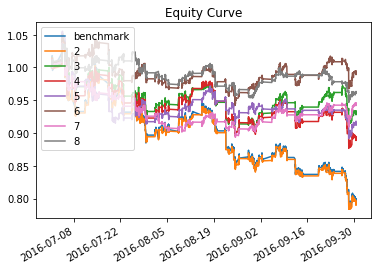

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.296660             -0.001716                -0.008672   
3               0.280502             -0.001314                -0.007500   
4               0.243469             -0.000076                -0.006094   
5               0.268258             -0.000900                -0.005163   
6               0.279376             -0.000573                -0.004335   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.004052                 -0.000578             -0.045088   
3                 0.003833                 -0.000330             -0.042522   
4        

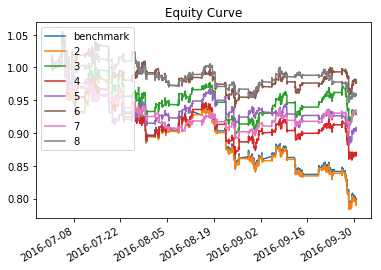

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.290990             -0.002143                -0.007789   
3               0.281865             -0.001473                -0.007438   
4               0.239854             -0.000290                -0.005875   
5               0.267711             -0.001075                -0.005045   
6               0.283420             -0.000631                -0.004288   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.003697                 -0.000595             -0.039205   
3                 0.003809                 -0.000362             -0.043079   
4        

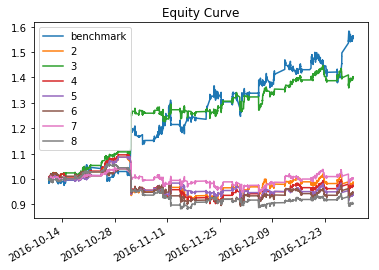

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.446293             -0.000111                -0.006379   
1               0.453956              0.005821                -0.005442   
2               0.436682             -0.000317                -0.005924   
3               0.454755             -0.000934                -0.006145   
4               0.452696             -0.000824                -0.005410   
5               0.442414              0.000144                -0.005303   
6               0.449404             -0.001665                -0.005318   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002919                 -0.000009             -0.141906   
1                 0.003182                  0.000369             -0.053809   
2                 0.002935                 -0.000022             -0.137762   
3                 0.002955                 -0.000068             -0.142034   
4        

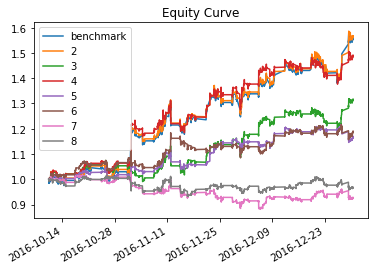

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.418273              0.006831                -0.009973   
3               0.446815              0.002743                -0.009862   
4               0.466354              0.003034                -0.008584   
5               0.437912             -0.001190                -0.007380   
6               0.445772             -0.000472                -0.006430   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.009527                  0.002656             -0.049516   
3                 0.006414                  0.000643             -0.108766   
4        

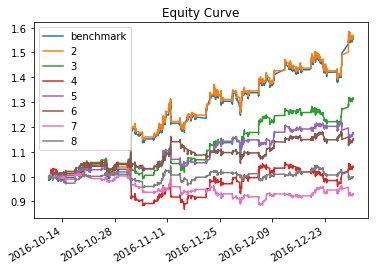

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.414771              0.000759                -0.011178   
3               0.447137              0.002861                -0.009840   
4               0.462834              0.002485                -0.008324   
5               0.436939             -0.001144                -0.007272   
6               0.446263              0.000045                -0.006228   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.007719                  0.000254             -0.137570   
3                 0.006365                  0.000655             -0.108766   
4        

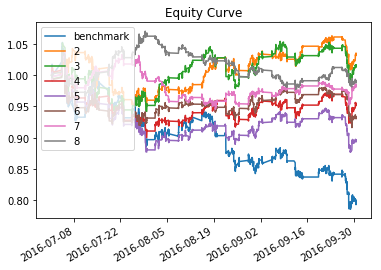

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244078              0.000563                -0.004945   
1               0.303041              0.000278                -0.006464   
2               0.276813             -0.000705                -0.006168   
3               0.292939             -0.001690                -0.005740   
4               0.293991             -0.001061                -0.004871   
5               0.263811             -0.000207                -0.004105   
6               0.270481             -0.000124                -0.004084   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002702                  0.000062             -0.036224   
1                 0.003278                  0.000048             -0.044435   
2                 0.002806                 -0.000122             -0.047470   
3                 0.003281                 -0.000257             -0.046179   
4        

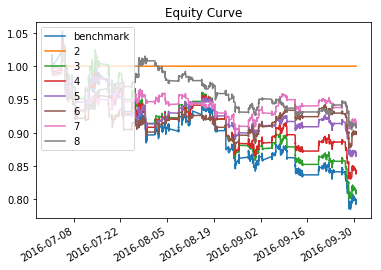

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.451723e-01             -0.003255                -0.208323   
2           2.927402e-01             -0.002683                -0.016281   
3           2.903615e-01             -0.002194                -0.009947   
4           2.989473e-01             -0.001621                -0.007992   
5           2.673555e-01             -0.001357                -0.005675   
6           2.766739e-01             -0.001451                -0.004995   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.104161             -0.208323   
2                 0.005544                 -0.002454             -0.057118   
3                 0.005298                 -0.001087             -0.040942   
4        

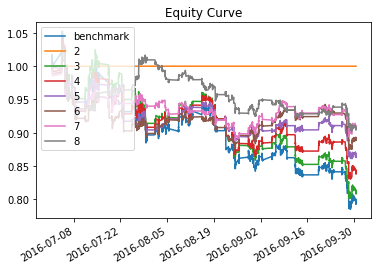

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.451723e-01             -0.003255                -0.208323   
2           2.927402e-01             -0.002683                -0.016281   
3           2.902690e-01             -0.002226                -0.010104   
4           2.999250e-01             -0.001778                -0.007867   
5           2.644286e-01             -0.001479                -0.005620   
6           2.784896e-01             -0.001504                -0.004976   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.104161             -0.208323   
2                 0.005544                 -0.002454             -0.057118   
3                 0.005153                 -0.001077             -0.040942   
4        

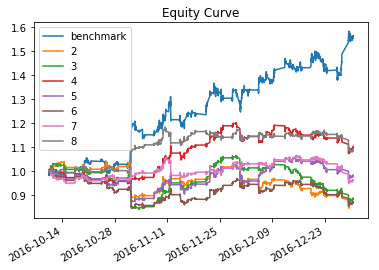

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.475735             -0.002167                -0.007993   
1               0.453282             -0.001905                -0.009446   
2               0.456147              0.001758                -0.008247   
3               0.473717             -0.000190                -0.007813   
4               0.484162             -0.002223                -0.007414   
5               0.484778             -0.000509                -0.005961   
6               0.460218              0.001496                -0.005637   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003568                 -0.000245             -0.146698   
1                 0.004920                 -0.000332             -0.146698   
2                 0.004289                  0.000212             -0.094431   
3                 0.004842                 -0.000030             -0.118715   
4        

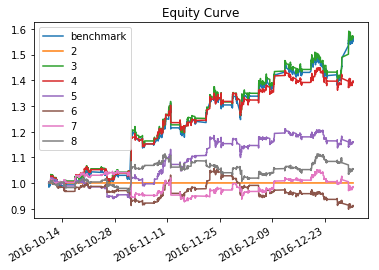

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.428839e-01              0.007728                      NaN   
2           4.392065e-01              0.005744                -0.012233   
3           4.588730e-01              0.002600                -0.011594   
4           4.361646e-01             -0.001479                -0.011241   
5           4.744547e-01             -0.000162                -0.008767   
6           4.644156e-01              0.000998                -0.006957   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011254                  0.003095             -0.060158   
3                 0.009926                  0.001007             -0.078696   
4        

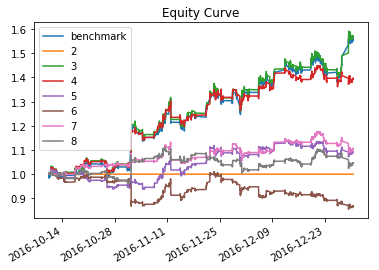

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.428839e-01              0.007728                      NaN   
2           4.392065e-01              0.005744                -0.012233   
3           4.676905e-01              0.001569                -0.011903   
4           4.481429e-01             -0.002303                -0.011398   
5           4.751058e-01              0.001794                -0.008230   
6           4.644980e-01              0.000843                -0.006926   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011254                  0.003095             -0.060158   
3                 0.009500                  0.000594             -0.096821   
4        

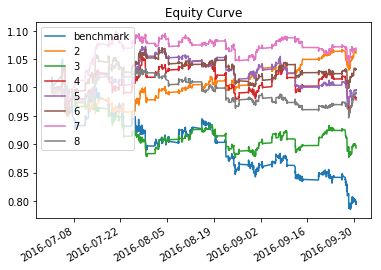

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.265745              0.000944                -0.007049   
1               0.292056             -0.001738                -0.009850   
2               0.289616             -0.000320                -0.008230   
3               0.273945             -0.000054                -0.006202   
4               0.276844              0.000519                -0.006085   
5               0.251808              0.001072                -0.005817   
6               0.263677             -0.000135                -0.005849   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003633                  0.000175             -0.042833   
1                 0.004281                 -0.000633             -0.047324   
2                 0.004388                 -0.000083             -0.061960   
3                 0.004434                 -0.000008             -0.047775   
4        

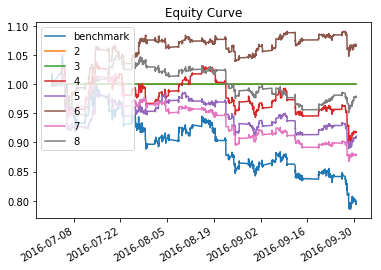

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           3.056335e-01             -0.001307                -0.014779   
3           3.072032e-01             -0.001438                -0.012724   
4           2.879403e-01              0.001060                -0.008266   
5           2.924609e-01             -0.001971                -0.008425   
6           2.760188e-01             -0.000326                -0.006746   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.007130                 -0.001021             -0.077778   
3                 0.008712                 -0.001232             -0.070738   
4        

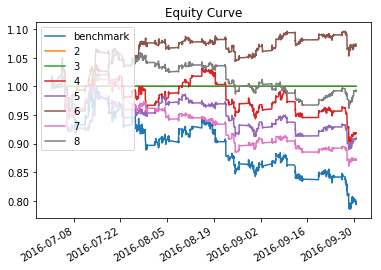

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           3.056335e-01             -0.001307                -0.014779   
3           3.072032e-01             -0.001438                -0.012724   
4           2.884356e-01              0.001136                -0.008261   
5           2.911013e-01             -0.002092                -0.008250   
6           2.795589e-01             -0.000102                -0.006684   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.007130                 -0.001021             -0.077778   
3                 0.008712                 -0.001232             -0.070738   
4        

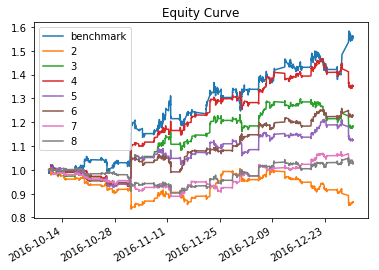

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.449054             -0.002378                -0.011184   
1               0.411443              0.002936                -0.011627   
2               0.465321              0.005204                -0.010022   
3               0.476262              0.002068                -0.009136   
4               0.495221              0.003547                -0.008098   
5               0.483049              0.000604                -0.008435   
6               0.481643              0.000510                -0.008745   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005267                 -0.000477             -0.143765   
1                 0.008518                  0.000920             -0.068706   
2                 0.007269                  0.001260             -0.074885   
3                 0.006576                  0.000399             -0.094419   
4        

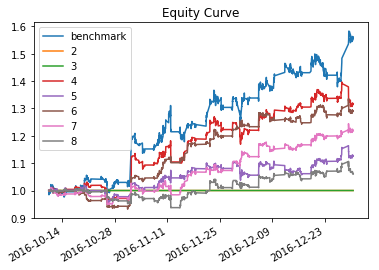

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           4.688232e-01              0.004754                -0.014081   
3           4.653443e-01              0.002119                -0.014459   
4           4.742060e-01              0.004396                -0.010964   
5           4.729591e-01              0.003419                -0.010763   
6           4.941372e-01              0.001085                -0.009750   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.015947                  0.003397             -0.060560   
3                 0.016536                  0.001453             -0.090181   
4        

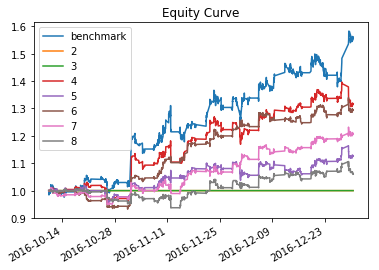

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           4.688232e-01              0.004754                -0.014081   
3           4.653443e-01              0.002119                -0.014459   
4           4.742810e-01              0.004447                -0.010917   
5           4.728632e-01              0.003252                -0.011015   
6           4.948152e-01              0.001080                -0.009715   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.015947                  0.003397             -0.060560   
3                 0.016536                  0.001453             -0.090181   
4        

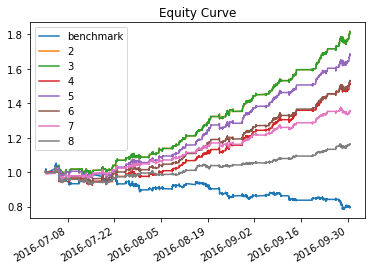

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244934              0.009255                -0.002889   
1               0.244934              0.009255                -0.002889   
2               0.271598              0.006514                -0.003259   
3               0.256403              0.008177                -0.002955   
4               0.275883              0.006695                -0.003084   
5               0.266293              0.004786                -0.002977   
6               0.275255              0.002409                -0.002826   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001768                  0.000372             -0.032218   
1                 0.001768                  0.000372             -0.032218   
2                 0.001761                  0.000296             -0.027434   
3                 0.001758                  0.000319             -0.028542   
4        

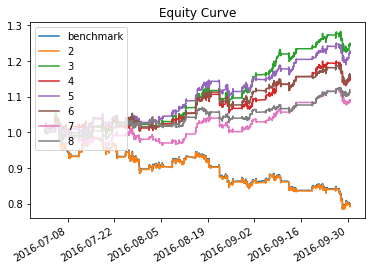

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.279023              0.003476                -0.003890   
2               0.248334              0.002234                -0.004517   
3               0.241395              0.003223                -0.004116   
4               0.245119              0.002377                -0.004149   
5               0.249158              0.001377                -0.003928   
6               0.261736              0.001793                -0.003500   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002192                  0.000249             -0.030195   
2                 0.002641                  0.000216             -0.029502   
3                 0.002513                  0.000278             -0.029187   
4        

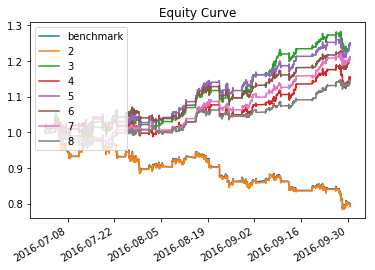

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.279023              0.003476                -0.003890   
2               0.247056              0.002268                -0.004207   
3               0.239937              0.003519                -0.004014   
4               0.242522              0.002991                -0.003882   
5               0.241333              0.003019                -0.003637   
6               0.262445              0.002137                -0.003348   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002192                  0.000249             -0.030195   
2                 0.002463                  0.000194             -0.028050   
3                 0.002440                  0.000289             -0.029397   
4        

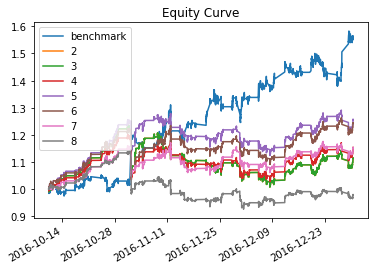

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.466133              0.001911                -0.004294   
1               0.466133              0.001911                -0.004294   
2               0.436500              0.002503                -0.004631   
3               0.453239              0.003953                -0.004343   
4               0.455351              0.003777                -0.004521   
5               0.430807              0.002487                -0.004443   
6               0.463656             -0.000276                -0.004151   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002108                  0.000072             -0.134260   
1                 0.002108                  0.000072             -0.134260   
2                 0.002195                  0.000108             -0.134260   
3                 0.002147                  0.000149             -0.116885   
4        

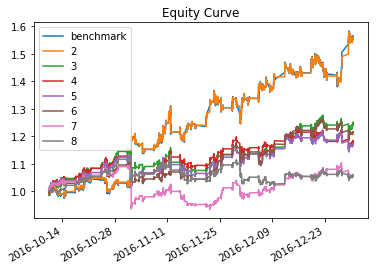

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.385649              0.003865                -0.005277   
2               0.411711              0.002934                -0.006217   
3               0.408748              0.002782                -0.005965   
4               0.415130              0.003375                -0.005834   
5               0.430745              0.001038                -0.005875   
6               0.458069              0.001042                -0.005308   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002931                  0.000254             -0.115746   
2                 0.003676                  0.000255             -0.121298   
3                 0.003425                  0.000224             -0.122083   
4        

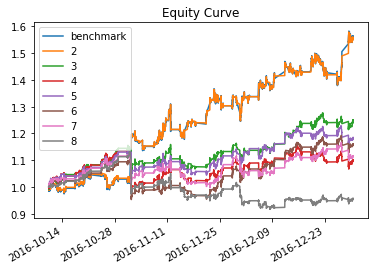

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.385649              0.003865                -0.005277   
2               0.399511              0.001720                -0.006034   
3               0.407196              0.002966                -0.005839   
4               0.402456              0.002597                -0.005699   
5               0.434506              0.001931                -0.005465   
6               0.450362             -0.000649                -0.005089   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002931                  0.000254             -0.115746   
2                 0.003387                  0.000140             -0.133195   
3                 0.003347                  0.000233             -0.122083   
4        

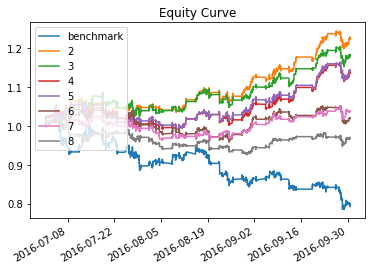

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257246              0.003227                -0.004204   
1               0.267064              0.002638                -0.003994   
2               0.265189              0.002051                -0.004042   
3               0.246796              0.002117                -0.004074   
4               0.264325              0.000315                -0.003864   
5               0.265645              0.000590                -0.003809   
6               0.257937             -0.000520                -0.003690   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002301                  0.000249             -0.029763   
1                 0.002332                  0.000176             -0.029565   
2                 0.002292                  0.000144             -0.029763   
3                 0.002327                  0.000153             -0.031637   
4        

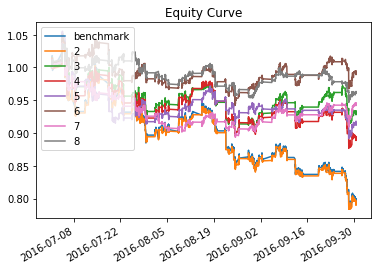

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.296660             -0.001716                -0.008672   
3               0.280502             -0.001314                -0.007500   
4               0.243469             -0.000076                -0.006094   
5               0.268258             -0.000900                -0.005163   
6               0.279376             -0.000573                -0.004335   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.004052                 -0.000578             -0.045088   
3                 0.003833                 -0.000330             -0.042522   
4        

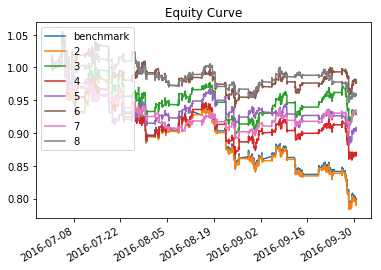

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.290990             -0.002143                -0.007789   
3               0.281865             -0.001473                -0.007438   
4               0.239854             -0.000290                -0.005875   
5               0.267711             -0.001075                -0.005045   
6               0.283420             -0.000631                -0.004288   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.003697                 -0.000595             -0.039205   
3                 0.003809                 -0.000362             -0.043079   
4        

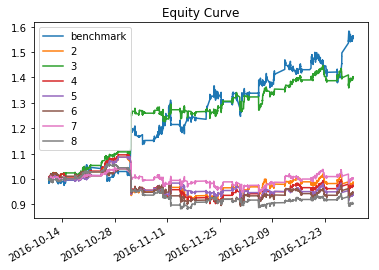

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.446293             -0.000111                -0.006379   
1               0.453956              0.005821                -0.005442   
2               0.436682             -0.000317                -0.005924   
3               0.454755             -0.000934                -0.006145   
4               0.452696             -0.000824                -0.005410   
5               0.442414              0.000144                -0.005303   
6               0.449404             -0.001665                -0.005318   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002919                 -0.000009             -0.141906   
1                 0.003182                  0.000369             -0.053809   
2                 0.002935                 -0.000022             -0.137762   
3                 0.002955                 -0.000068             -0.142034   
4        

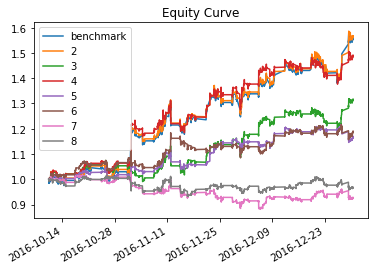

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.418273              0.006831                -0.009973   
3               0.446815              0.002743                -0.009862   
4               0.466354              0.003034                -0.008584   
5               0.437912             -0.001190                -0.007380   
6               0.445772             -0.000472                -0.006430   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.009527                  0.002656             -0.049516   
3                 0.006414                  0.000643             -0.108766   
4        

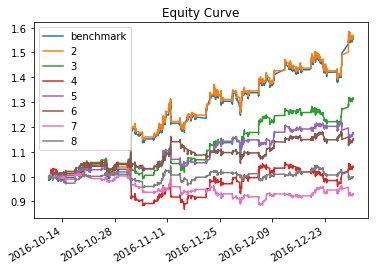

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.414771              0.000759                -0.011178   
3               0.447137              0.002861                -0.009840   
4               0.462834              0.002485                -0.008324   
5               0.436939             -0.001144                -0.007272   
6               0.446263              0.000045                -0.006228   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.007719                  0.000254             -0.137570   
3                 0.006365                  0.000655             -0.108766   
4        

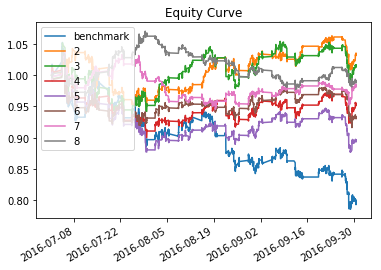

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244078              0.000563                -0.004945   
1               0.303041              0.000278                -0.006464   
2               0.276813             -0.000705                -0.006168   
3               0.292939             -0.001690                -0.005740   
4               0.293991             -0.001061                -0.004871   
5               0.263811             -0.000207                -0.004105   
6               0.270481             -0.000124                -0.004084   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002702                  0.000062             -0.036224   
1                 0.003278                  0.000048             -0.044435   
2                 0.002806                 -0.000122             -0.047470   
3                 0.003281                 -0.000257             -0.046179   
4        

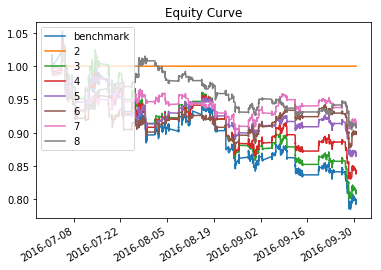

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.451723e-01             -0.003255                -0.208323   
2           2.927402e-01             -0.002683                -0.016281   
3           2.903615e-01             -0.002194                -0.009947   
4           2.989473e-01             -0.001621                -0.007992   
5           2.673555e-01             -0.001357                -0.005675   
6           2.766739e-01             -0.001451                -0.004995   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.104161             -0.208323   
2                 0.005544                 -0.002454             -0.057118   
3                 0.005298                 -0.001087             -0.040942   
4        

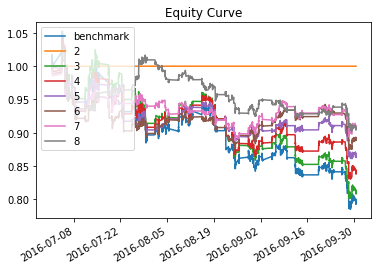

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.451723e-01             -0.003255                -0.208323   
2           2.927402e-01             -0.002683                -0.016281   
3           2.902690e-01             -0.002226                -0.010104   
4           2.999250e-01             -0.001778                -0.007867   
5           2.644286e-01             -0.001479                -0.005620   
6           2.784896e-01             -0.001504                -0.004976   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.104161             -0.208323   
2                 0.005544                 -0.002454             -0.057118   
3                 0.005153                 -0.001077             -0.040942   
4        

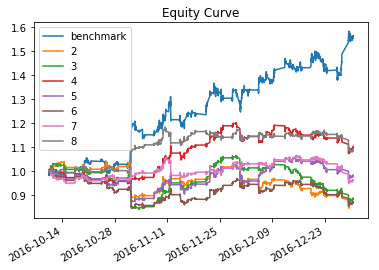

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.475735             -0.002167                -0.007993   
1               0.453282             -0.001905                -0.009446   
2               0.456147              0.001758                -0.008247   
3               0.473717             -0.000190                -0.007813   
4               0.484162             -0.002223                -0.007414   
5               0.484778             -0.000509                -0.005961   
6               0.460218              0.001496                -0.005637   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003568                 -0.000245             -0.146698   
1                 0.004920                 -0.000332             -0.146698   
2                 0.004289                  0.000212             -0.094431   
3                 0.004842                 -0.000030             -0.118715   
4        

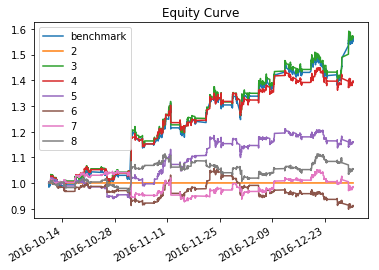

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.428839e-01              0.007728                      NaN   
2           4.392065e-01              0.005744                -0.012233   
3           4.588730e-01              0.002600                -0.011594   
4           4.361646e-01             -0.001479                -0.011241   
5           4.744547e-01             -0.000162                -0.008767   
6           4.644156e-01              0.000998                -0.006957   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011254                  0.003095             -0.060158   
3                 0.009926                  0.001007             -0.078696   
4        

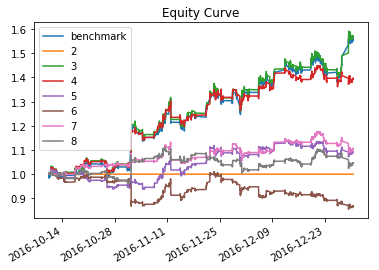

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.428839e-01              0.007728                      NaN   
2           4.392065e-01              0.005744                -0.012233   
3           4.676905e-01              0.001569                -0.011903   
4           4.481429e-01             -0.002303                -0.011398   
5           4.751058e-01              0.001794                -0.008230   
6           4.644980e-01              0.000843                -0.006926   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011254                  0.003095             -0.060158   
3                 0.009500                  0.000594             -0.096821   
4        

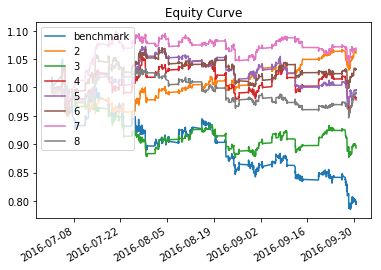

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.265745              0.000944                -0.007049   
1               0.292056             -0.001738                -0.009850   
2               0.289616             -0.000320                -0.008230   
3               0.273945             -0.000054                -0.006202   
4               0.276844              0.000519                -0.006085   
5               0.251808              0.001072                -0.005817   
6               0.263677             -0.000135                -0.005849   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003633                  0.000175             -0.042833   
1                 0.004281                 -0.000633             -0.047324   
2                 0.004388                 -0.000083             -0.061960   
3                 0.004434                 -0.000008             -0.047775   
4        

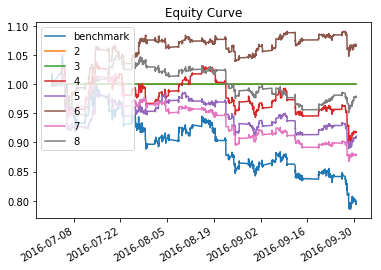

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           3.056335e-01             -0.001307                -0.014779   
3           3.072032e-01             -0.001438                -0.012724   
4           2.879403e-01              0.001060                -0.008266   
5           2.924609e-01             -0.001971                -0.008425   
6           2.760188e-01             -0.000326                -0.006746   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.007130                 -0.001021             -0.077778   
3                 0.008712                 -0.001232             -0.070738   
4        

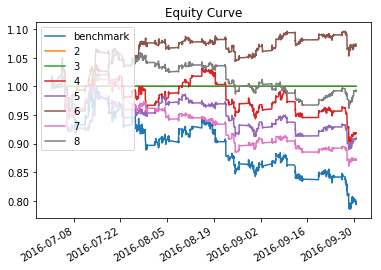

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           3.056335e-01             -0.001307                -0.014779   
3           3.072032e-01             -0.001438                -0.012724   
4           2.884356e-01              0.001136                -0.008261   
5           2.911013e-01             -0.002092                -0.008250   
6           2.795589e-01             -0.000102                -0.006684   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.007130                 -0.001021             -0.077778   
3                 0.008712                 -0.001232             -0.070738   
4        

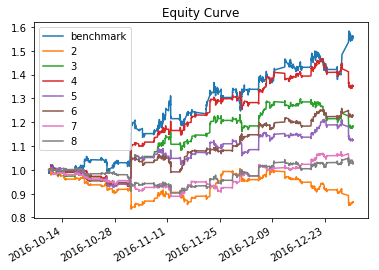

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.449054             -0.002378                -0.011184   
1               0.411443              0.002936                -0.011627   
2               0.465321              0.005204                -0.010022   
3               0.476262              0.002068                -0.009136   
4               0.495221              0.003547                -0.008098   
5               0.483049              0.000604                -0.008435   
6               0.481643              0.000510                -0.008745   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005267                 -0.000477             -0.143765   
1                 0.008518                  0.000920             -0.068706   
2                 0.007269                  0.001260             -0.074885   
3                 0.006576                  0.000399             -0.094419   
4        

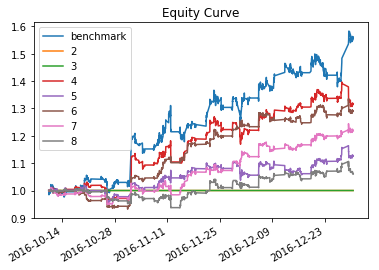

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           4.688232e-01              0.004754                -0.014081   
3           4.653443e-01              0.002119                -0.014459   
4           4.742060e-01              0.004396                -0.010964   
5           4.729591e-01              0.003419                -0.010763   
6           4.941372e-01              0.001085                -0.009750   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.015947                  0.003397             -0.060560   
3                 0.016536                  0.001453             -0.090181   
4        

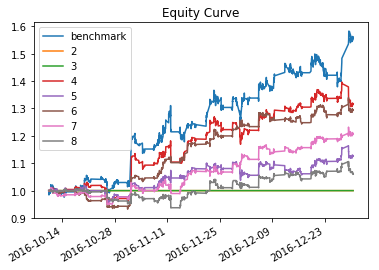

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           1.000000e-07              0.000000                      NaN   
2           4.688232e-01              0.004754                -0.014081   
3           4.653443e-01              0.002119                -0.014459   
4           4.742810e-01              0.004447                -0.010917   
5           4.728632e-01              0.003252                -0.011015   
6           4.948152e-01              0.001080                -0.009715   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.015947                  0.003397             -0.060560   
3                 0.016536                  0.001453             -0.090181   
4        

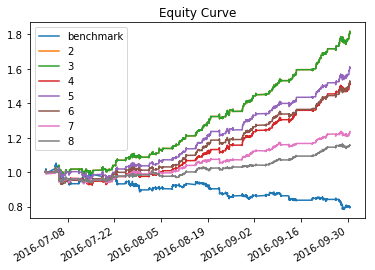

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244934              0.009255                -0.002889   
1               0.244934              0.009255                -0.002889   
2               0.271598              0.006514                -0.003259   
3               0.258133              0.007458                -0.003058   
4               0.291789              0.006658                -0.003041   
5               0.281462              0.003348                -0.002987   
6               0.275198              0.002319                -0.002890   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001768                  0.000372             -0.032218   
1                 0.001768                  0.000372             -0.032218   
2                 0.001761                  0.000296             -0.027434   
3                 0.001758                  0.000313             -0.028542   
4        

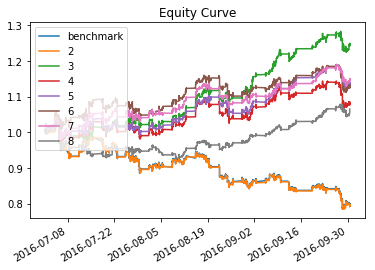

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.279023              0.003476                -0.003890   
2               0.294437              0.001262                -0.004828   
3               0.251955              0.002063                -0.004421   
4               0.269937              0.001940                -0.004782   
5               0.263582              0.002211                -0.004422   
6               0.281680              0.001016                -0.003759   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002192                  0.000249             -0.030195   
2                 0.002504                  0.000125             -0.035857   
3                 0.002673                  0.000200             -0.030532   
4        

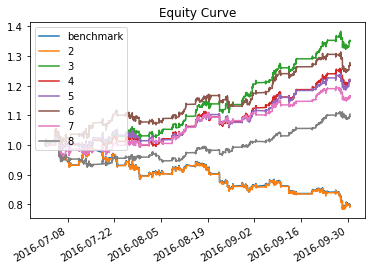

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.301749             -0.003520                -0.225310   
1               0.263120              0.004719                -0.003509   
2               0.263013              0.003111                -0.003800   
3               0.249072              0.003131                -0.003771   
4               0.260246              0.003832                -0.003878   
5               0.265666              0.002415                -0.003711   
6               0.279294              0.001576                -0.003448   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.112655             -0.225310   
1                 0.002059                  0.000283             -0.029443   
2                 0.002197                  0.000217             -0.028651   
3                 0.002327                  0.000233             -0.029984   
4        

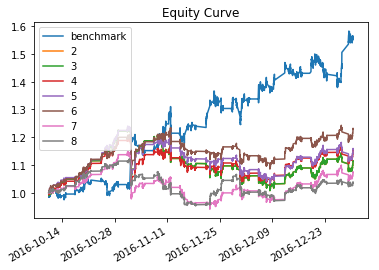

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.466133              0.001911                -0.004294   
1               0.466133              0.001911                -0.004294   
2               0.436500              0.002503                -0.004631   
3               0.449663              0.002574                -0.004500   
4               0.442176              0.003608                -0.004396   
5               0.450247              0.001300                -0.004384   
6               0.462611              0.000702                -0.004057   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002108                  0.000072             -0.134260   
1                 0.002108                  0.000072             -0.134260   
2                 0.002195                  0.000108             -0.134260   
3                 0.002135                  0.000102             -0.134036   
4        

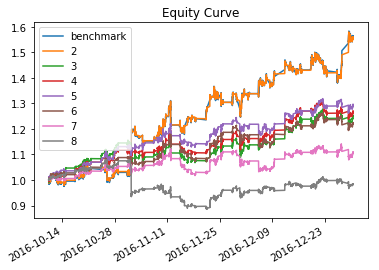

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.385649              0.003865                -0.005277   
2               0.398550              0.004103                -0.005898   
3               0.406303              0.004451                -0.005691   
4               0.461453              0.003476                -0.006303   
5               0.443378              0.001814                -0.005928   
6               0.438461             -0.000189                -0.005536   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002931                  0.000254             -0.115746   
2                 0.003360                  0.000335             -0.099211   
3                 0.003662                  0.000364             -0.100389   
4        

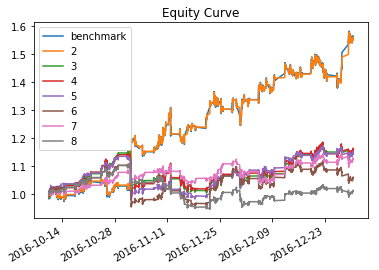

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.432832              0.007605                      NaN   
1               0.387859              0.002564                -0.004982   
2               0.379683              0.002642                -0.005323   
3               0.393647              0.002462                -0.005292   
4               0.427148              0.001076                -0.005694   
5               0.429562              0.002131                -0.005302   
6               0.452245              0.000305                -0.005051   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.448669                  0.224335              0.000000   
1                 0.002694                  0.000149             -0.133811   
2                 0.002866                  0.000170             -0.133811   
3                 0.003125                  0.000169             -0.135127   
4        

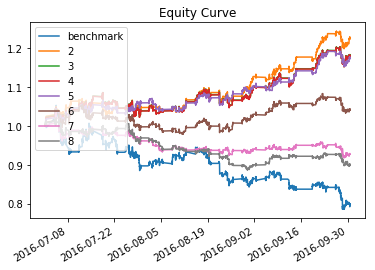

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257246              0.003227                -0.004204   
1               0.267064              0.002638                -0.003994   
2               0.266948              0.002626                -0.003996   
3               0.242008              0.002530                -0.003935   
4               0.254542              0.000639                -0.003778   
5               0.261896             -0.001157                -0.003840   
6               0.262997             -0.001622                -0.003799   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002301                  0.000249             -0.029763   
1                 0.002332                  0.000176             -0.029565   
2                 0.002332                  0.000175             -0.029565   
3                 0.002365                  0.000171             -0.030685   
4        

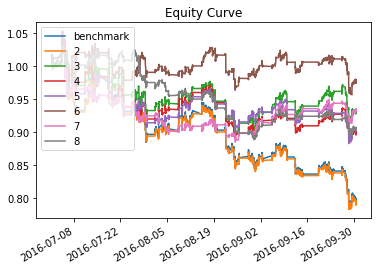

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.296190             -0.001586                -0.008067   
3               0.283392             -0.001532                -0.008662   
4               0.270956             -0.000313                -0.006116   
5               0.276719             -0.001093                -0.005264   
6               0.252840             -0.001493                -0.004461   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.004893                 -0.000622             -0.043577   
3                 0.004551                 -0.000622             -0.050064   
4        

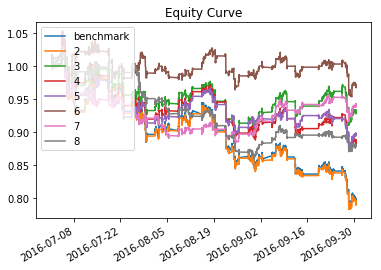

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296909             -0.003559                -0.227755   
1               0.293611             -0.001042                -0.006841   
2               0.298675             -0.001819                -0.008182   
3               0.281181             -0.001658                -0.008448   
4               0.270448             -0.000429                -0.005836   
5               0.270751             -0.000960                -0.005094   
6               0.249683             -0.001940                -0.004449   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.113877             -0.227755   
1                 0.003441                 -0.000251             -0.040451   
2                 0.004786                 -0.000664             -0.044195   
3                 0.004213                 -0.000604             -0.051271   
4        

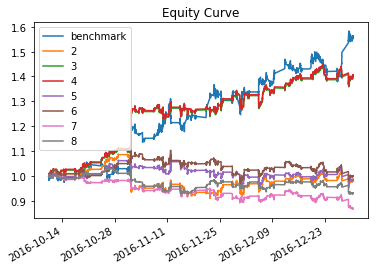

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.446293             -0.000111                -0.006379   
1               0.453956              0.005821                -0.005442   
2               0.453906              0.005872                -0.005448   
3               0.462663             -0.000159                -0.005774   
4               0.460860              0.000098                -0.005228   
5               0.453551             -0.002278                -0.005238   
6               0.454640             -0.001095                -0.005211   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002919                 -0.000009             -0.141906   
1                 0.003182                  0.000369             -0.053809   
2                 0.003182                  0.000372             -0.053809   
3                 0.003047                 -0.000009             -0.105898   
4        

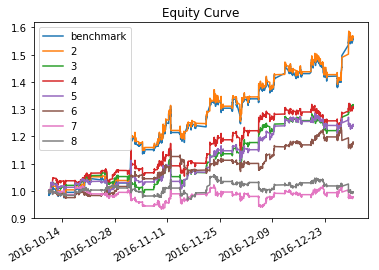

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.429237              0.004634                -0.010633   
3               0.462420              0.003792                -0.012101   
4               0.452329              0.002875                -0.007886   
5               0.441562             -0.000269                -0.007304   
6               0.439244              0.000024                -0.006274   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.010368                  0.002071             -0.086139   
3                 0.010184                  0.001722             -0.099755   
4        

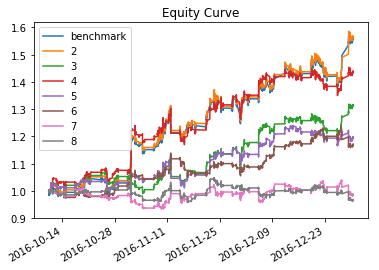

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.439552              0.007683                      NaN   
1               0.426330              0.004729                -0.009076   
2               0.416615              0.006241                -0.009566   
3               0.443727              0.003168                -0.011429   
4               0.454718              0.002765                -0.007599   
5               0.437173             -0.000116                -0.007138   
6               0.440850             -0.000473                -0.006165   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.453307                  0.226653              0.000000   
1                 0.006873                  0.001281             -0.106536   
2                 0.010923                  0.002523             -0.048125   
3                 0.009737                  0.001297             -0.102383   
4        

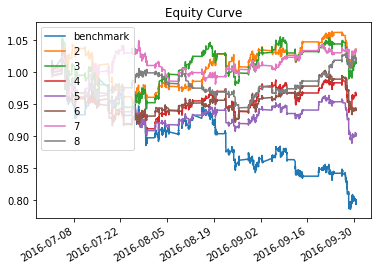

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.244078              0.000563                -0.004945   
1               0.303041              0.000278                -0.006464   
2               0.282948             -0.000519                -0.006588   
3               0.295331             -0.001581                -0.005806   
4               0.292069             -0.000905                -0.004966   
5               0.265470              0.000546                -0.004098   
6               0.249334              0.000289                -0.004014   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002702                  0.000062             -0.036224   
1                 0.003278                  0.000048             -0.044435   
2                 0.002920                 -0.000096             -0.047470   
3                 0.003335                 -0.000268             -0.046765   
4        

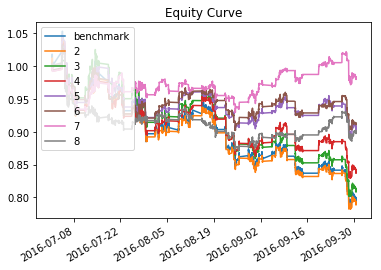

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296841             -0.003635                -0.232636   
1               0.245172             -0.003255                -0.208323   
2               0.291737             -0.002708                -0.016660   
3               0.291562             -0.001526                -0.010003   
4               0.291867             -0.001398                -0.008352   
5               0.282867             -0.000257                -0.005880   
6               0.283857             -0.001664                -0.005252   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.116318             -0.232636   
1                      NaN                 -0.104161             -0.208323   
2                 0.005458                 -0.002471             -0.057118   
3                 0.005426                 -0.000738             -0.042317   
4        

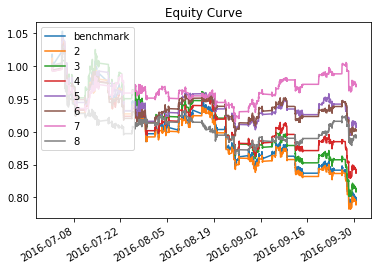

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.296841             -0.003635                -0.232636   
1               0.245172             -0.003255                -0.208323   
2               0.291737             -0.002708                -0.016660   
3               0.291131             -0.001457                -0.010070   
4               0.288911             -0.001565                -0.008205   
5               0.278151             -0.000437                -0.005801   
6               0.285290             -0.001779                -0.005221   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.116318             -0.232636   
1                      NaN                 -0.104161             -0.208323   
2                 0.005458                 -0.002471             -0.057118   
3                 0.005325                 -0.000691             -0.042317   
4        

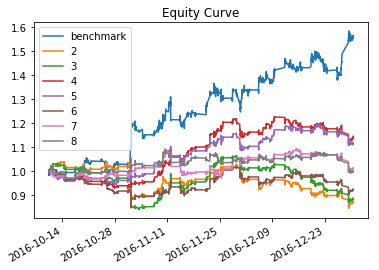

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.475735             -0.002167                -0.007993   
1               0.453282             -0.001905                -0.009446   
2               0.450058              0.002390                -0.008534   
3               0.445401              0.001965                -0.007680   
4               0.466044             -0.001200                -0.007698   
5               0.475752              0.000278                -0.006070   
6               0.455513              0.000073                -0.005860   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003568                 -0.000245             -0.146698   
1                 0.004920                 -0.000332             -0.146698   
2                 0.004550                  0.000325             -0.094431   
3                 0.005109                  0.000290             -0.092196   
4        

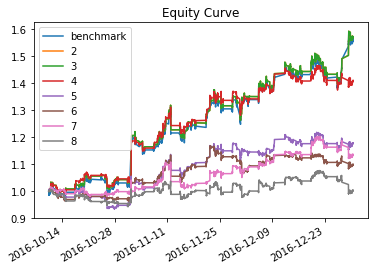

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.442884              0.007728                      NaN   
1               0.442884              0.007728                      NaN   
2               0.438491              0.005894                -0.012317   
3               0.465270              0.002864                -0.011483   
4               0.447296              0.001681                -0.010764   
5               0.470472              0.002235                -0.008660   
6               0.464503              0.000115                -0.007441   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.455949                  0.227974              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011203                  0.003169             -0.060158   
3                 0.009540                  0.001109             -0.074591   
4        

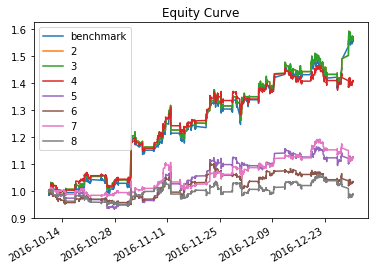

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.442884              0.007728                      NaN   
1               0.442884              0.007728                      NaN   
2               0.438491              0.005894                -0.012317   
3               0.463186              0.002103                -0.011589   
4               0.453007              0.000687                -0.010865   
5               0.471029              0.002086                -0.008427   
6               0.462331             -0.000110                -0.007448   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.455949                  0.227974              0.000000   
1                 0.455949                  0.227974              0.000000   
2                 0.011203                  0.003169             -0.060158   
3                 0.009235                  0.000806             -0.088828   
4        

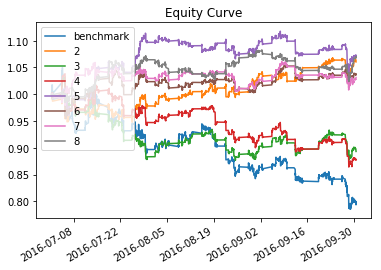

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.265745              0.000944                -0.007049   
1               0.292056             -0.001738                -0.009850   
2               0.281130             -0.002019                -0.007804   
3               0.266614              0.001073                -0.005916   
4               0.263025              0.000599                -0.005778   
5               0.249850              0.000509                -0.006063   
6               0.265612              0.001069                -0.005902   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003633                  0.000175             -0.042833   
1                 0.004281                 -0.000633             -0.047324   
2                 0.004969                 -0.000663             -0.042172   
3                 0.004515                  0.000236             -0.044292   
4        

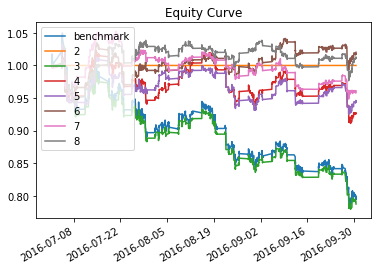

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.922676e-01             -0.003715                -0.237744   
2           3.066698e-01             -0.001164                -0.017114   
3           3.020763e-01             -0.000841                -0.011680   
4           2.879427e-01              0.000339                -0.008257   
5           2.782151e-01             -0.000596                -0.007875   
6           2.811632e-01              0.000208                -0.006565   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.118872             -0.237744   
2                 0.007561                 -0.001065             -0.076221   
3                 0.007787                 -0.000606             -0.064074   
4        

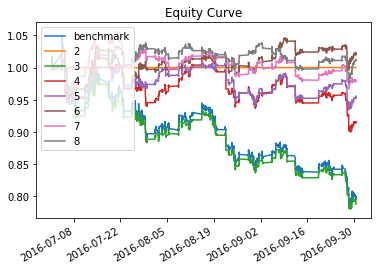

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           2.922676e-01             -0.003715                -0.237744   
2           3.080868e-01             -0.001364                -0.016582   
3           3.056522e-01             -0.000685                -0.011181   
4           2.880982e-01              0.000387                -0.008269   
5           2.769690e-01             -0.000280                -0.007780   
6           2.811632e-01              0.000208                -0.006565   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.118872             -0.237744   
2                 0.007445                 -0.001209             -0.076221   
3                 0.007670                 -0.000484             -0.061960   
4        

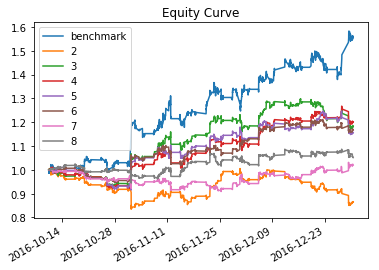

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.449054             -0.002378                -0.011184   
1               0.411443              0.002936                -0.011627   
2               0.457128              0.003192                -0.010484   
3               0.455988              0.002533                -0.009203   
4               0.497372              0.002698                -0.008212   
5               0.468509              0.000415                -0.008796   
6               0.457566              0.000931                -0.008529   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005267                 -0.000477             -0.143765   
1                 0.008518                  0.000920             -0.068706   
2                 0.009083                  0.000951             -0.078407   
3                 0.006662                  0.000522             -0.093701   
4        

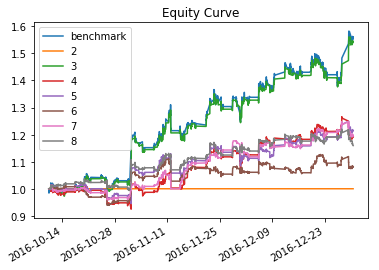

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.397420e-01              0.007447                      NaN   
2           4.569342e-01              0.003077                -0.017015   
3           4.707516e-01              0.003397                -0.013854   
4           4.936256e-01              0.001408                -0.011254   
5           4.973291e-01              0.003107                -0.011734   
6           4.782937e-01              0.002593                -0.009665   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.439381                  0.219690              0.000000   
2                 0.016285                  0.002454             -0.080054   
3                 0.015047                  0.002221             -0.075429   
4        

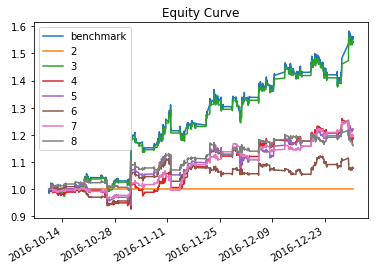

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0           1.000000e-07              0.000000                      NaN   
1           4.397420e-01              0.007447                      NaN   
2           4.559744e-01              0.002997                -0.016787   
3           4.723357e-01              0.003458                -0.013766   
4           4.924452e-01              0.001336                -0.011103   
5           4.978385e-01              0.003114                -0.011934   
6           4.784255e-01              0.002588                -0.009668   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.439381                  0.219690              0.000000   
2                 0.015980                  0.002343             -0.080054   
3                 0.015045                  0.002238             -0.075429   
4        

In [3]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        print(slm.tail(3))
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type), 
                                         max_order=7, offsets_average=True, n_offsets=5)
            lm_validation.run()
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, start='2016-10-1', end='2016-12-31', symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS', 
                                         max_order=7, offsets_average=True, n_offsets=5)
            lm_validation.run()

# Summary

In [15]:
#zn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prod = 'zn'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]
fig, axarr= plt.subplots(36, 2, figsize = (10, 130))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
img_cnt = 0
for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        for slm_th_type in slm_th_type_set:
            valid_dir_IS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)
            valid_dir_OS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS'
            print(valid_dir_IS)
            print(valid_dir_OS)
            img0 = mpimg.imread(valid_dir_IS+'\\performance_'+prod+'_major.png')
            img1 = mpimg.imread(valid_dir_OS+'\\performance_'+prod+'_major.png')
        
            axarr[img_cnt,0].imshow(img0,aspect='auto')
            axarr[img_cnt,0].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str()+', IS')
            axarr[img_cnt,0].axis('off')
            axarr[img_cnt,1].imshow(img1,aspect='auto')
            axarr[img_cnt,1].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str()+', OS')
            axarr[img_cnt,1].axis('off')         
            img_cnt = img_cnt+1

plt.tight_layout()            
fig.savefig(prod+'_all_test.png')


                  

C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type1
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type1\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type2
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type2\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type3
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\5min\type3\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type1
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type1\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type2
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type2\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type3
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\10min\type3\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\15min\type1
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\15min\type1\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\15min\type2
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\15min\type2\OS
C:\\Users\\wqiang\QishiQR\Validation\zn\0bps\15min\type3
C:\\Users\\wq

In [9]:
fig.savefig(prod+'_all_test.png')